In [1]:
!pip install anvil-uplink



     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 51 kB 260 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45230 sha256=1f373fca3863b4e8e3efc5c1b97743000d59125ea105e4590c09465886fa55e3
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [2]:
import anvil.server


In [3]:
anvil.server.connect('Q5NUPCWH4O5GYHYV2YHXJIXW-4DY7D2XE2C6DNMJY')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/defcom17/NSL_KDD/master/20%20Percent%20Training%20Set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv')


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

df = pd.read_csv("https://raw.githubusercontent.com/defcom17/NSL_KDD/master/20%20Percent%20Training%20Set.csv", header=None, names = col_names)
df.drop(["difficulty_level"],axis=1)
df_test = pd.read_csv("https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv", header=None, names = col_names)
df_test.drop(["difficulty_level"],axis=1)
print(df_test.label.value_counts())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


normal             9710
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
phf                   2
sqlattack             2
loadmodule            2
udpstorm              2
worm                  2
imap                  1
Name: label, dtype: int64


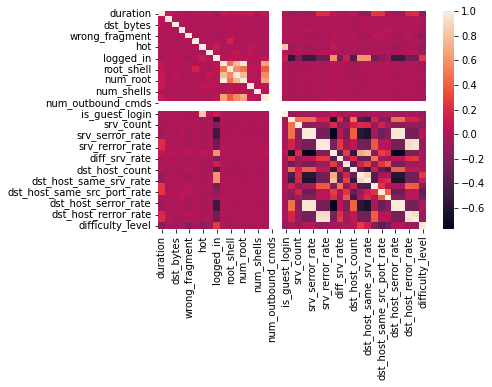

In [6]:
import seaborn as sns
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()




In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.protocol_type=le.fit_transform(df.protocol_type)
df.service= le.fit_transform(df.service)
df.flag= le.fit_transform(df.flag)

In [8]:
# defining function to check price 
labeldf_test_0=df_test['label']
# change the label column
#0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.

newlabeldf_test_0=labeldf_test_0.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4}) 

df_test_0=df_test
df_test_0['label']= newlabeldf_test_0
df_test_0.label.value_counts()

0    9710
1    7460
3    2885
2    2421
4      67
Name: label, dtype: int64

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/defcom17/NSL_KDD/master/20%20Percent%20Training%20Set.csv", header=None, names = col_names)
df.drop(["difficulty_level"],axis=1)
df_test = pd.read_csv("https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv", header=None, names = col_names)
df_test.drop(["difficulty_level"],axis=1)
print(df_test.label.value_counts())
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.protocol_type=le.fit_transform(df.protocol_type)
df.service= le.fit_transform(df.service)
df.flag= le.fit_transform(df.flag)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


normal             9710
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
phf                   2
sqlattack             2
loadmodule            2
udpstorm              2
worm                  2
imap                  1
Name: label, dtype: int64


In [10]:
# defining function to check price 
labeldf=df['label']
labeldf_test=df_test['label']
# change the label column
#0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
#Here all attacks are class 1
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1}) 

df['label'] = newlabeldf
df_test['label'] = newlabeldf_test
df_test.label.value_counts()

1    12833
0     9710
Name: label, dtype: int64

In [11]:
y_train=df.label
x_train=df.drop(["label","difficulty_level"],axis=1)

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_test.protocol_type=le.fit_transform(df_test.protocol_type)
df_test.service= le.fit_transform(df_test.service)
df_test.flag= le.fit_transform(df_test.flag)

y_test=df_test.label
X_test=df_test.drop(["label","difficulty_level"],axis=1)

dataframe=x_train
#dataframe = preprocessing.normalize(dataframe)
pca = PCA(n_components=20)
pca.fit(dataframe)
x_train=pca.transform(dataframe)

print (pca.explained_variance_)

#Training Validation Split
x_val=x_train[25162:]
y_val=y_train[25162:]
x_train=x_train[0:25162]
y_train=y_train[0:25162]
#Use the same set of vectors to transform from x dimensions to extracted set of dimensions
#note we are not fitting again,we are using the previously fitted one
X_test=pca.transform(X_test)

PCA(n_components=20)

[5.81198284e+12 7.89079471e+09 7.16467472e+06 2.14562130e+04
 1.01878291e+04 6.32219513e+03 2.22919350e+03 2.38875738e+02
 1.88311481e+02 4.67090761e+00 3.63596845e+00 5.37728990e-01
 2.77713455e-01 1.79952418e-01 1.23233602e-01 1.08067006e-01
 6.29324067e-02 5.05675008e-02 3.68693452e-02 3.33518668e-02]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 =KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf2 = RandomForestClassifier(n_estimators=200, random_state=42)

In [14]:
eclf1 = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2)], voting='soft')
eclf1 = eclf1.fit(x_train, y_train)
pred1=eclf1.predict_proba(X_test)

In [27]:
#Training set results:

pred1=eclf1.predict_proba(x_train)
from sklearn.metrics import confusion_matrix
@anvil.server.callable
def testing():
  d=[0.05,0.045,0.04,0.035,0.03,0.025,0.02,0.015,0.01]
  result_list=[]
  for j in d:
    h=[]
    for i in range(25162):
        if (pred1[i][1]>=j):
          h.append(1)
        else:
          h.append(0)
    results = confusion_matrix(y_train, h)
    detection_rate=(results[1][1])/(results[1][1]+results[1][0])
    fpr=(results[0][1])/(results[0][1]+results[0][0])
    result_list.append([j,fpr*100,detection_rate*100])
  return result_list

In [16]:
#Validation set results:

pred1=eclf1.predict_proba(x_val)
from sklearn.metrics import confusion_matrix

d=[0.75,.7,0.6,0.05,0.045,0.04,0.035,0.03,0.025,0.02,0.015,0.01]
result_list=[]
for j in d:
  h=[]
  for i in range(30):
      if (pred1[i][1]>=j):
        h.append(1)
      else:
        h.append(0)
  results = confusion_matrix(y_val, h)
  detection_rate=(results[1][1])/(results[1][1]+results[1][0])
  fpr=(results[0][1])/(results[0][1]+results[0][0])
  result_list.append([j,fpr*100,detection_rate*100])
print(result_list)

[[0.75, 0.0, 100.0], [0.7, 0.0, 100.0], [0.6, 0.0, 100.0], [0.05, 7.6923076923076925, 100.0], [0.045, 7.6923076923076925, 100.0], [0.04, 7.6923076923076925, 100.0], [0.035, 7.6923076923076925, 100.0], [0.03, 7.6923076923076925, 100.0], [0.025, 7.6923076923076925, 100.0], [0.02, 7.6923076923076925, 100.0], [0.015, 7.6923076923076925, 100.0], [0.01, 7.6923076923076925, 100.0]]


In [17]:
#Test Set Results
import time

start = time.time()


pred1=eclf1.predict_proba(X_test)
from sklearn.metrics import confusion_matrix
d=[0.075,0.07,0.065,0.06,0.05,0.045,0.04,0.035,0.03,0.025,0.02,0.015,0.01]

result_list=[]
for j in d:
  h=[]
  for i in range(22543):
      if (pred1[i][1]>=j):
        h.append(1)
      else:
        h.append(0)
  results = confusion_matrix(y_test, h)
  detection_rate=(results[1][1])/(results[1][1]+results[1][0])
  fpr=(results[0][1])/(results[0][1]+results[0][0])
  accuracy=(results[1][1]+results[0][0])/(results[1][1]+results[1][0]+results[0][1]+results[0][0])
  result_list.append([j,fpr*100,detection_rate*100,accuracy*100])
print(result_list)
end = time.time()
print(f"The time required for a single sample is {(end - start)/(22543*13)} seconds")

[[0.075, 5.262615859938208, 86.37886698355801, 89.97915095595084], [0.07, 5.345005149330587, 86.52692277721499, 90.0279465909595], [0.065, 5.406797116374872, 86.98667497857087, 90.2630528323648], [0.06, 6.230690010298661, 88.03865035455466, 90.50703100740807], [0.05, 9.062821833161689, 88.87243824514923, 89.7617885818214], [0.045, 9.237899073120493, 89.28543598535028, 89.92148338730426], [0.04, 9.402677651905252, 90.13480869632977, 90.33402830146831], [0.035, 9.701338825952627, 91.44393360866516, 90.95062768930488], [0.03, 9.938208032955716, 92.28551390945219, 91.32768486891717], [0.025, 10.401647785787848, 92.89332190446505, 91.47407177394314], [0.02, 11.071060762100927, 93.6725629237123, 91.62933061260702], [0.015, 12.337796086508753, 94.59985973661654, 91.61158674533114], [0.01, 13.738414006179198, 95.87781500818203, 91.73579381626226]]
The time required for a single sample is 3.836614423476675e-05 seconds


In [18]:
#Test Set Results
import time
start = time.time()

pred1=eclf1.predict_proba(X_test)
from sklearn.metrics import confusion_matrix
d=[0.065]

result_list=[]
for j in d:
  h=[]
  for i in range(22543):
      if (pred1[i][1]>=j):
        h.append(1)
      else:
        h.append(0)
  results = confusion_matrix(y_test, h)
  detection_rate=(results[1][1])/(results[1][1]+results[1][0])
  fpr=(results[0][1])/(results[0][1]+results[0][0])
  result_list.append([j,fpr*100,detection_rate*100])
print(result_list)
end = time.time()
print(f"The time required for a single sample is {(end - start)/(22543*13)} seconds")

[[0.065, 5.406797116374872, 86.98667497857087]]
The time required for a single sample is 3.7071355110591165e-05 seconds


In [19]:
print(h)

[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
c1=c2=c3=c4=0
for i in range(22543):
  if (df_test_0.label[i]==1 and h[i]==1):
    c1=c1+1
  if (df_test_0.label[i]==2 and h[i]==1):
    c2=c2+1
  if (df_test_0.label[i]==3 and h[i]==1):
    c3=c3+1
  if (df_test_0.label[i]==4 and h[i]==1):
    c4=c4+1

In [21]:
print(c1,c2,c3,c4)

7124 2415 1571 53


In [22]:
def calling_function():
    print("Testing Results:",c1,c2,c3,c4 ,'time reuired to exicute it', {(end - start)/(22543*13)}, 'seconds' )

In [23]:
calling_function()
@anvil.server.callable
def calling_func():
    return("Testing Results:",c1,c2,c3,c4 ,'time reuired to exicute it') 


Testing Results: 7124 2415 1571 53 time reuired to exicute it {3.7071355110591165e-05} seconds


In [ ]:
anvil.server.wait_forever()